# **AIRBNB ANALYSIS**

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>**

## **Table of content**

*  Loading Data

*  Checking for NaN values 

*  Handling NaNs

*  Analysis

## **Questions for analysis are as follows**
**Question 1) Which hosts are having heighest number of appartments ?**

**Question 2) Which are the top 10 neighbourhood which are having maximum number of appartments for airbnb ?**

**Question 3) What is the distribution of the room type and its distribution over the location ?**

**Question 4) What is the average preferred price by the customeres according to the neighbourhood_group for each category of Room_type ?**

**Question 5) What is the price between the different types of room ?**

**Question 6) Which are the top 5 hosts that have obatained heighest no. of reviews ?**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AIrbnb Project/Airbnb NYC 2019.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [5]:
df.shape

(48895, 16)

In [6]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
df.describe(include='object')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


In [9]:
for col in df.describe(include='object').columns:
  print(col)

name
host_name
neighbourhood_group
neighbourhood
room_type
last_review


In [10]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [13]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,40.728129,-73.951149,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,1.069372e+07,7.589752e+07,0.054991,0.046693,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## **Question 1) Which hosts are having heighest number of appartments ?**

In [14]:
host_counts = df.groupby('host_id')['availability_365'].nunique()
max_host_id = host_counts.idxmax()
max_host_id


219517861

In [15]:
df[df['host_id']==219517861]['host_name'].unique()

array(['Sonder (NYC)'], dtype=object)

In [16]:
df_sonder=df[df['host_name']=='Sonder (NYC)']
df_sonder[['host_name','neighbourhood_group','neighbourhood','latitude','longitude']].head(6)

,host_name,neighbourhood_group,neighbourhood,latitude,longitude
38294,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641
38588,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443
39769,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614
39770,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528
39771,Sonder (NYC),Manhattan,Murray Hill,40.74845,-73.97446
39772,Sonder (NYC),Manhattan,Hell's Kitchen,40.76188,-73.99616


## **Question 2) Which are the top 10 neighbourhood which are having maximum number of appartments for airbnb ?**

In [17]:
df['neighbourhood'].value_counts().head(10)

Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2204
Bushwick              1942
Hell's Kitchen        1528
East Village          1489
Upper West Side       1482
Upper East Side       1405
Crown Heights         1265
Midtown                986
Name: neighbourhood, dtype: int64

<Axes: >

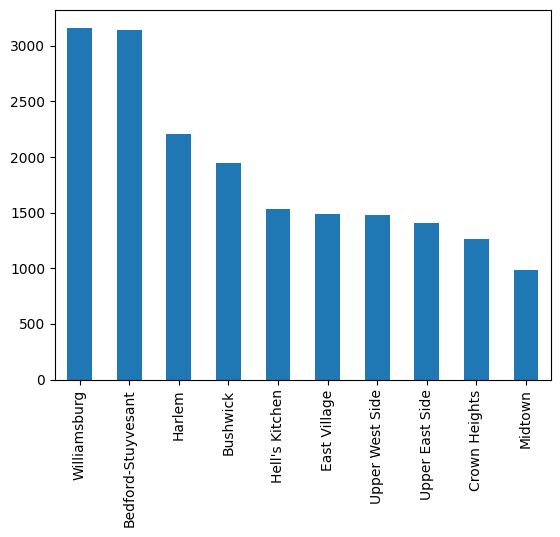

In [18]:
pd.value_counts(df['neighbourhood'])[:10].plot.bar()

### **Question 3) What is the distribution of the room type and its distribution over the location  ?** 

<Axes: >

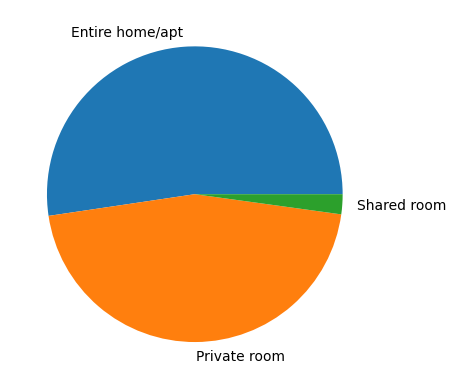

In [19]:
df.groupby('room_type').size()
df.groupby('room_type').size().plot.pie()

## **Question 4) What is the average preferred price by the customeres according to the neighbourhood_group for each category of Room_type ?**

In [20]:
avg_price_df = df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_price_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,120.938312,57.093511,56.930233
Brooklyn,171.281897,73.349562,45.458621
Manhattan,230.200964,106.607488,77.980337
Queens,139.225603,69.302838,64.467105
Staten Island,125.366667,57.584906,57.600000


<Axes: xlabel='neighbourhood_group', ylabel='Average Price calculated'>

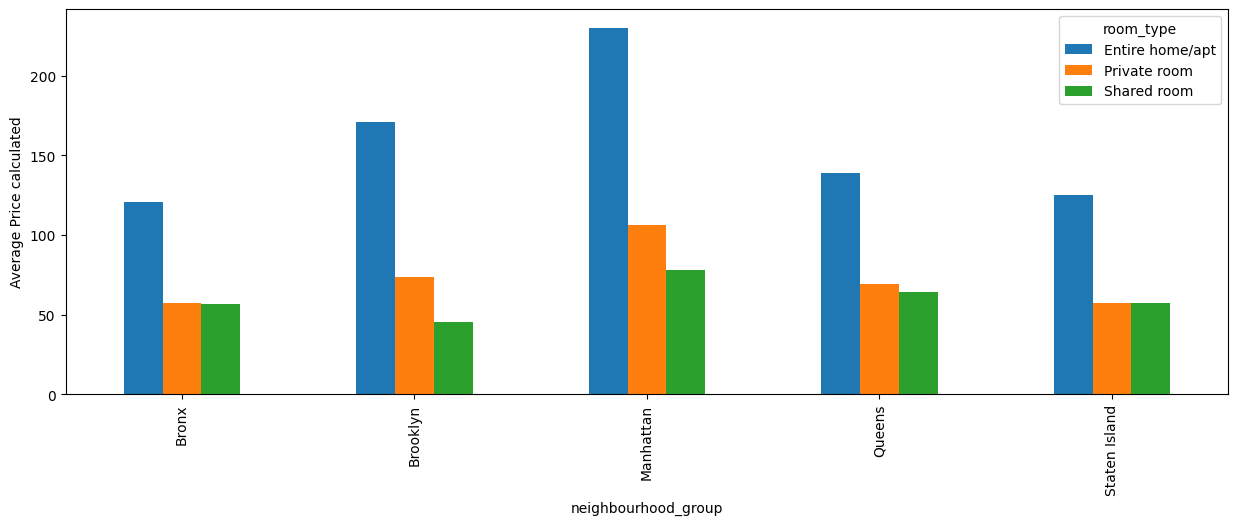

In [21]:
avg_price_df.plot.bar(figsize=(15,5),ylabel='Average Price calculated')

** **

### **Question 5) What is the price between the different types of room ?**

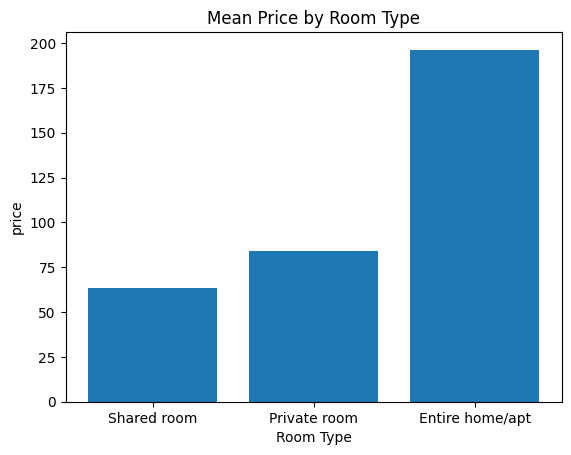

In [22]:

grouped = df.groupby('room_type')['price'].mean().sort_values()
plt.bar(grouped.index, grouped.values)
plt.xlabel('Room Type')
plt.ylabel('price')
plt.title('Mean Price by Room Type')
plt.show()


### **Question 6) Which are the top 5 hosts that have obatained heighest no. of reviews ?**


In [23]:
host_highest_df=df.groupby(['host_id','host_name'],as_index=False)['number_of_reviews'].sum().sort_values(['number_of_reviews'],ascending = False)
host_highest_df.head(5)


,host_id,host_name,number_of_reviews
17445,37312959,Maya,2273
947,344035,Brooklyn& Breakfast -Len-,2205
15359,26432133,Danielle,2017
17112,35524316,Yasu & Akiko,1971
17931,40176101,Brady,1818


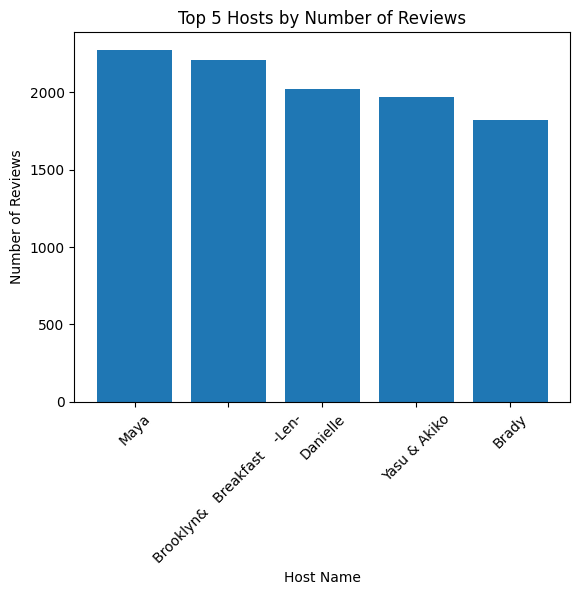

In [24]:
host_highest_df = df.groupby(['host_id', 'host_name'], as_index=False)['number_of_reviews'].sum().sort_values(['number_of_reviews'], ascending=False)

fig, ax = plt.subplots()
ax.bar(host_highest_df['host_name'].head(5), host_highest_df['number_of_reviews'].head(5))

ax.set_xlabel('Host Name')
ax.set_ylabel('Number of Reviews')
ax.set_title('Top 5 Hosts by Number of Reviews')

plt.xticks(rotation=45)
plt.show()


### **Conclusion**

### **In conclusion, the analysis of the provided questions reveals the following key findings:**

1) Based on the data, it can be determined which hosts have the highest number of apartments.

2) The top 10 neighborhoods with the maximum number of apartments available on Airbnb have been identified.

3) The distribution of room types and their respective locations has been examined, providing insights into the variety of accommodations available in different areas.

4) By analyzing the average preferred price by customers, categorized by neighborhood group and room type, valuable information about pricing preferences has been uncovered.

5) The price ranges for different types of rooms have been explored, shedding light on the cost differences between various accommodation options.

6) The top 5 hosts who have obtained the highest number of reviews have been identified, indicating their exceptional performance and customer satisfaction.

